### CONNECTTEL CUSTOMER CHURN PREDICTION
### PROJECT ANALYSIS / GUIDE

### 1. Problem definition: 
#### Clearly articulate the problem that is to be solved with your data mining. How will the company benefit from your solution?

### 2. Perform exploratory data analysis in Python: 
#### a) Visualize relationships between the label and some key features 
#### b) Explore correlations 
#### c) Conduct univariate, bivariate, and multivariate analysis as much as is feasible

### 3. Perform feature engineering: 
#### a) Encoding categorical variables 
#### b) Create new features from existing features where necessary, depending on insights from your EDA

### 4. Model selection, training, and validation: 
#### a) Train and test at least 3 supervised learning model

### 5. Model evaluation: 
#### a) Analyze the results of your trained model 
#### b) What metrics are most important for the problem? 
#### Should the business be more concerned with better results on false negatives or true positives?

### 6. Submission: 
#### a) Publish your Jupyter Notebook to your GitHub profile and Google Classroom. 
#### b) In the readme file, include a description of the project and summarize the steps you took and the challenges you faced. 
#### c) share the link with your instructor.

In [ ]:
#1: Problem definition: 
# Churn is a big problem to telecommunication industry as competition is very high and  
# companies try every measure to keep their customers. Churn is the main variable in this findings

In [1]:
# Import necessary libraries
import numpy as np # Data Visualisation 
import pandas as pd # Data preprocessing 
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation 
plt.style.use('ggplot')

import matplotlib.ticker as mtick
from collections import Counter # For counting
import missingno as msno # Missing Data Visualisation

sns.set(style = 'white')

%matplotlib inline
from matplotlib import style

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset to python to get detailed information

df = pd.read_csv("Customer_Churn_Prediction.csv")

In [3]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns.values

array(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
# Investigating the dataset to know if there are any missing values

df.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From the information above, the dataset comprises of 15 categorical data, 3 numerical data and 2 floats

In [6]:
#Convert TotalCharges to numeric variable 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The dataset shows that there are 11 missing values for TotalCharges. We will now remove these 11 rows from the data set

In [7]:
# Remove the missing data
df.dropna(inplace=True)

# Remove CustomerID column from the data set
df2 = df.iloc[:,1:]

# Convert the predicator 'Yes' and 'No' variables to numeric variables 1 and 0
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No', value=0, inplace=True)

In [8]:
# Convert all categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)

#Convert all 'True' and 'False' values to 1 and 0
df_dummies = df_dummies.applymap(lambda x: 1 if x is True else (0 if x is False else x))

df_dummies.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


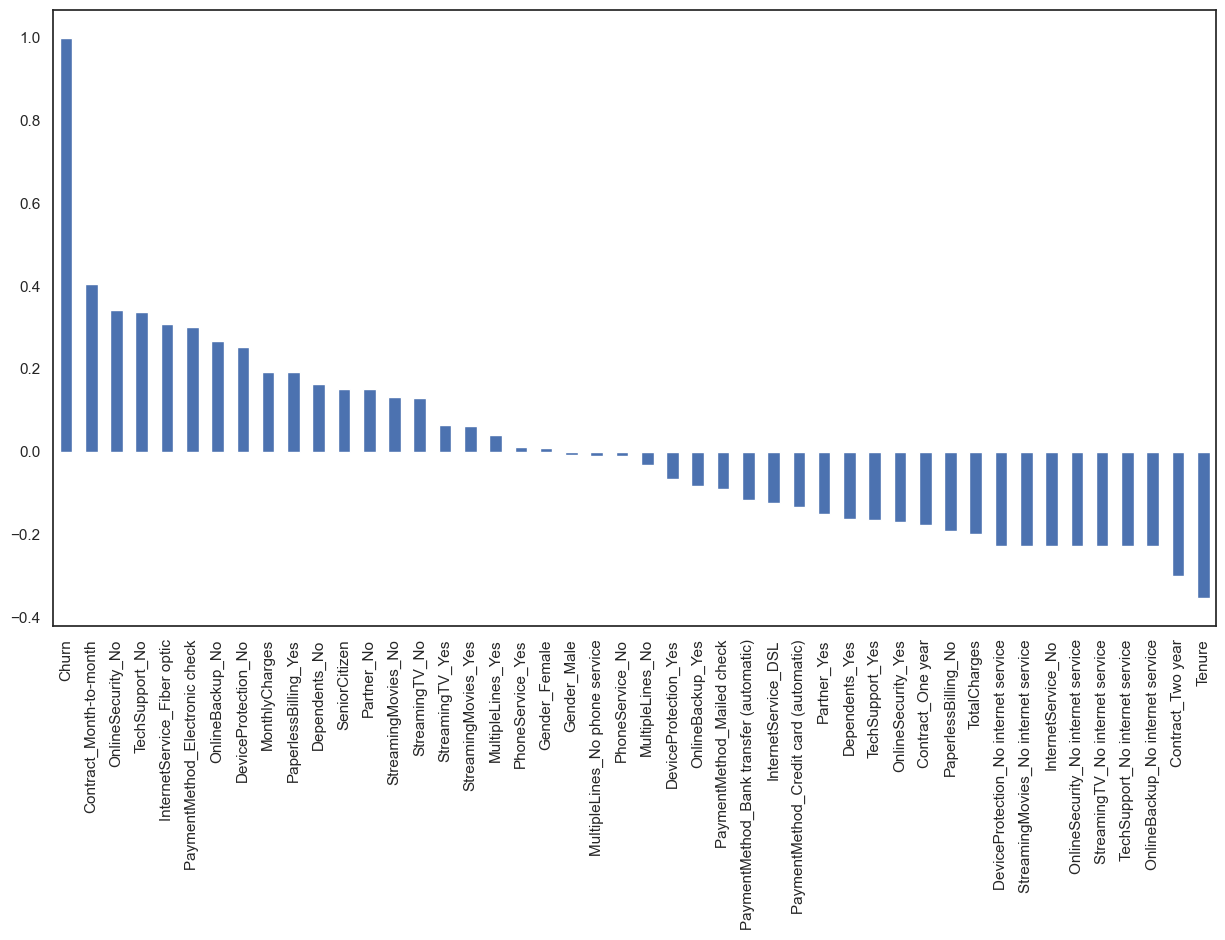

In [9]:
#Churn correlation with other variables

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

plt.show()

Correlation is a numerical value ranging from -1 to +1. It indicates the strength of linear relationship variables. A positive correlation is recorded when there is an increase in same directions of two or more variables. A negative correlation means that as one variable increases, the other decreases. A zero correlation is when there is no linear relationship between the variables From the correlation graph above, month to month contract, no online security and no tech support are positively correlated with 'churn' as they tend to increase as churn increases. While tenure and two year contract moves the oposite direction from churn, hence, negative are correlation with curn.

## Exploratory Data Analysis
Haven't succesfully cleaned our data, we will now explore the data further to gain more insite. First, we will take a look at the demographic distribution of the data set

### Gender Distribution

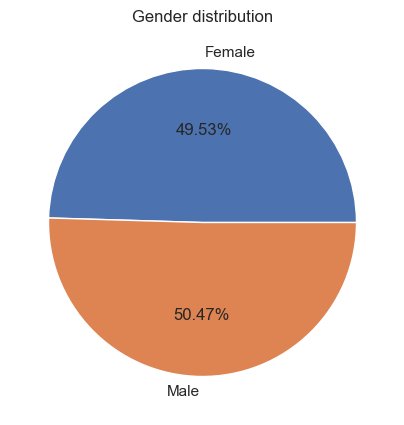

In [10]:
#1: Gender distribution

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Gender distribution")
plt.show();

50.47% of the customers are Male, while 49.53% are female

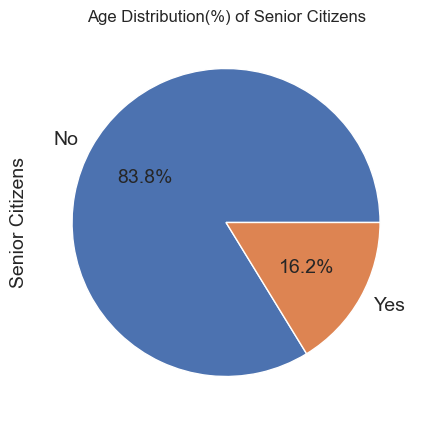

In [11]:
#2: Age distribution - Senior Citizens

ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'], figsize = (5,5), fontsize = 14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize = 14)
ax.set_title('Age Distribution(%) of Senior Citizens', fontsize = 12)

plt.show();

16.24% of the customers are Senior Citizen, hence, 83.76% of the customers are younger people

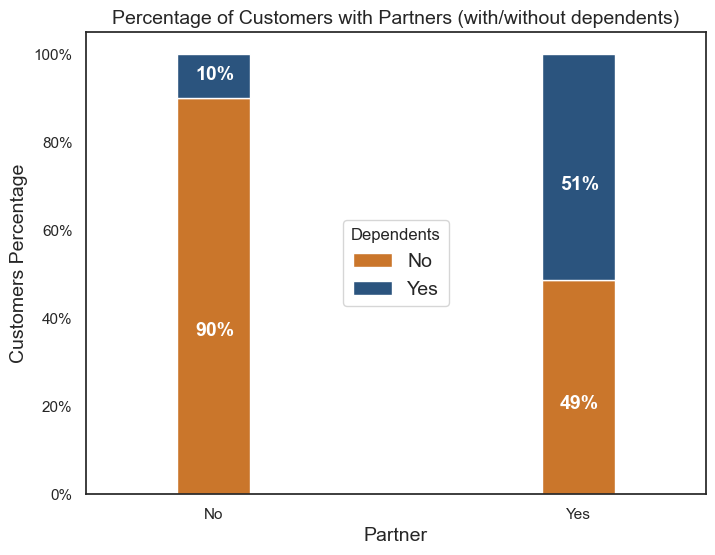

In [12]:
pd = df.groupby(['Partner', 'Dependents']).size().unstack()
ax = (pd.T*100.0 / pd.T.sum()).T.plot(kind='bar', width=0.2, stacked=True, color=['#CA762B', '#2B547E'], rot=0, figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc = 'center', prop = {'size':14}, title='Dependents', fontsize=14)
ax.set_ylabel('Customers Percentage', size=14)
ax.set_title('Percentage of Customers with Partners (with/without dependents)', size=14)
ax.xaxis.label.set_size(14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
               color = 'white', weight = 'bold', size = 14)

plt.show()

48% of the customers have partners, while the remaining 52% do not have partners. I explored further and interesting to know is that, 51% of the customers with partners also have dependents, while 49% of them said they do not have dependents. 90% of the customers without partners do not have dependents.

### Exploring Customer tenure / contract information

The below histogram shows that majority of the telcom customers have only been with the company for just a month or so, while over half of the customers have been with the company for over 70 months. This could mean that the type of contracts customers have with the company could be the influential factor about wether they will stay or leave

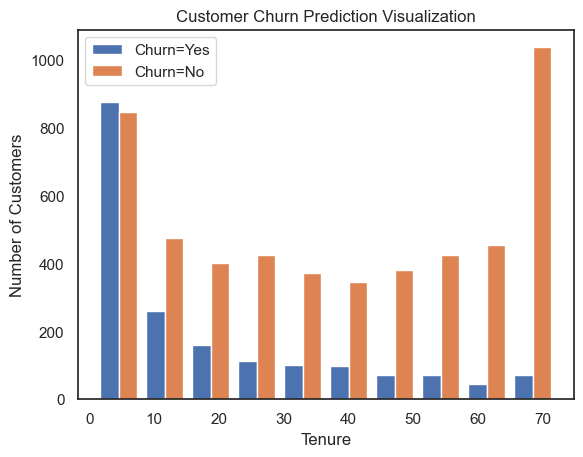

In [13]:
#Visualising tenure of customers that churn
tenure_churn_no = df[df.Churn=='No'].Tenure
tenure_churn_yes = df[df.Churn=='Yes'].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes', 'Churn=No'])
plt.legend()

A close observation shows that majority of the customers that have been with the company for a long time are not leaving. This is evident in the 70 month on the graph ploted above. The different types of contract could be a deciding factor for customers to stay or leave the telecom company.
For better understanding, we will plot the same graph for MonthlyCharges. You know sometimes, if the monthly charges is very high, customers might leave. So let's explore that.

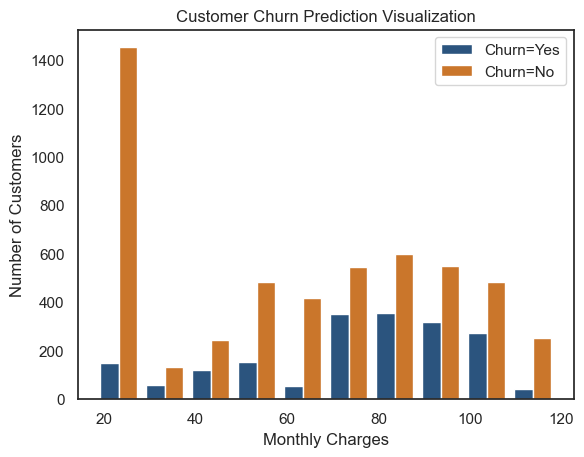

In [14]:
#Visualising MonthlyCharges of customers that churn
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes, mc_churn_no], color=['#2B547E', '#CA762B'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [15]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column} : {df[column].unique()}')

CustomerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
 def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [17]:
#Replace columns with 'No phone service' and 'No internet service' with just 'No'
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [18]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column} : {df[column].unique()}')

CustomerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


### Constumers distributions by the various services

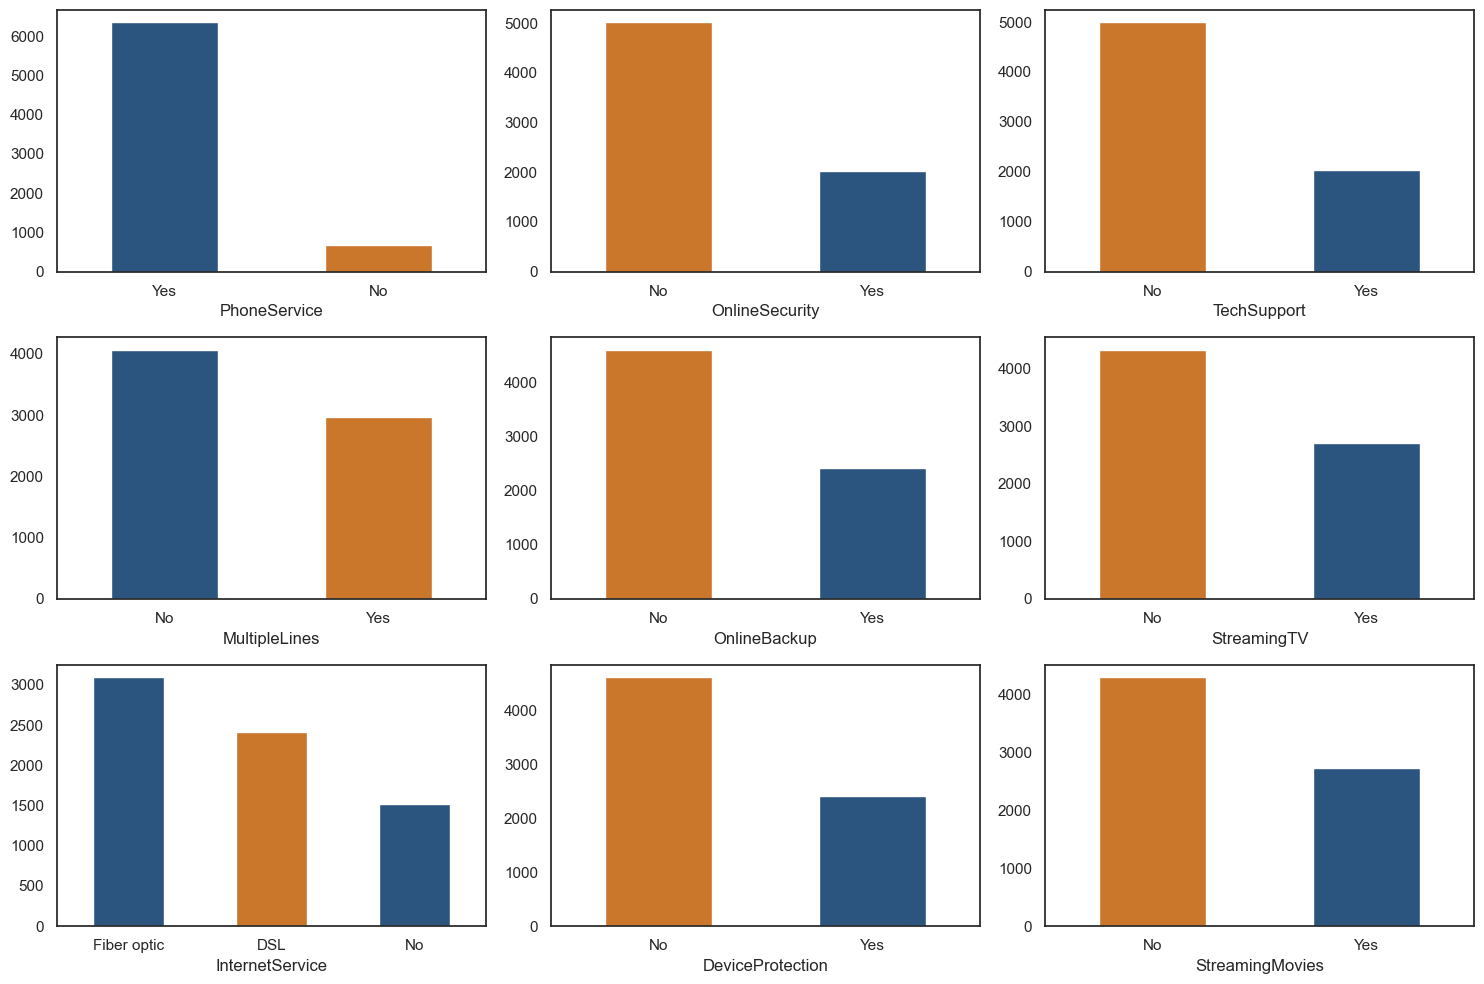

In [19]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar', color = ['#2B547E', '#CA762B'], ax=axes[i,0], rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar', color = ['#CA762B', '#2B547E'], ax=axes[i-3,1], rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar', color = ['#CA762B', '#2B547E'], ax=axes[i-6,2], rot = 0)
        
    plt.tight_layout()

Using the scattered plot, we will now take a look at the relationship between monthly charges and total charges.

From the scattered plot below, total charges increases as monthly bills increases. This could suggest why customers on short contracts tends to leave

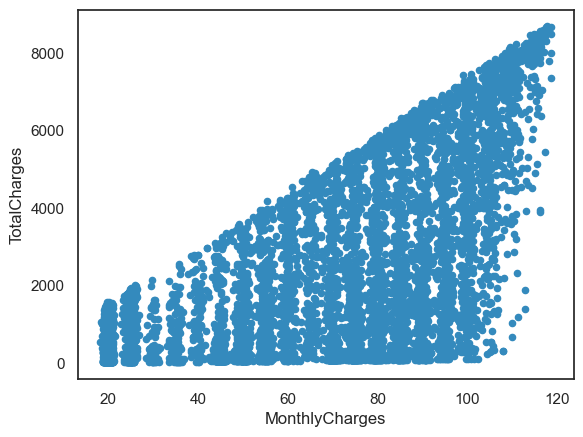

In [20]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y = 'TotalCharges')

plt.show()

### Exploriing the Churn rate in our data

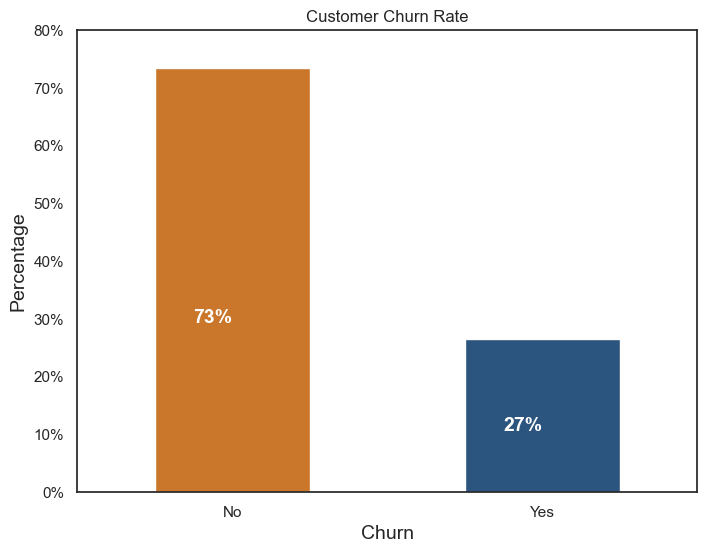

In [21]:
colors = ['#CA762B', '#2B547E']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color = colors, figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers Percentage',size = 14)
ax.set_xlabel('Churn', size = 14)
ax.set_title('Churn Rate', size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
               color = 'white', weight = 'bold', size = 14)
plt.title('Customer Churn Rate')
plt.ylabel('Percentage')
plt.ylim(0, 80)

plt.show()

The data shows that majority of the customers do not churn. The percentage of customers that churned is approximated at 27%, while 73% of the total customers did not leave the company
As we can see from the above graph, a larger population of the customers are in the month-to-month category, with a very high number of the customers leaving the telecom company. Interestingly, a very low number of cutomers in the two-years contract category are likely to leave the company. Evidently, the longer the contract of the customers, the more loyal they are to the telecom company

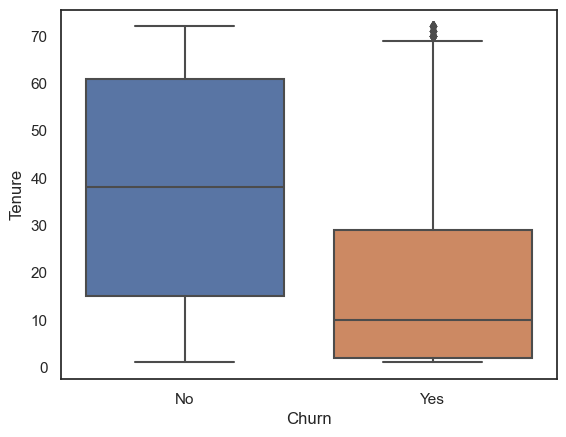

In [22]:
# Churn and Tenure of customer
color = ['#EE9A4D', '#2B547E']
sns.boxplot(x = df.Churn, y = df.Tenure)

plt.show()

The boxplot displays the high churn tendency for customers with a month to month contract

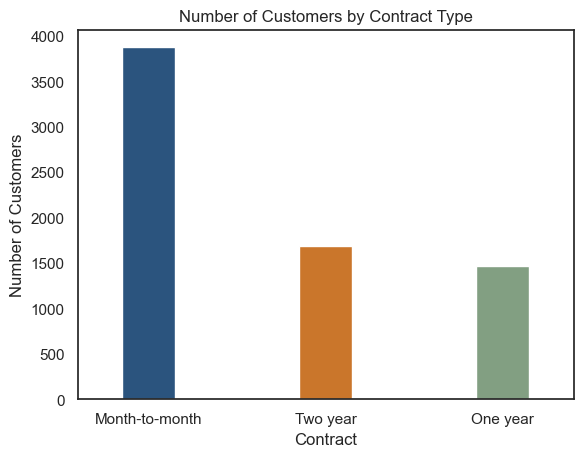

In [23]:
# Churn by Contracts of customers
colors = ['#2B547E', '#CA762B', '#829F82']
ax = df['Contract'].value_counts().plot(kind='bar', rot=0, width=0.3, color=colors)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

plt.show()

From the graph above, majority of the customers are in the Month-to-month category. The rest of the customers are in the two year contract and one year contract categories

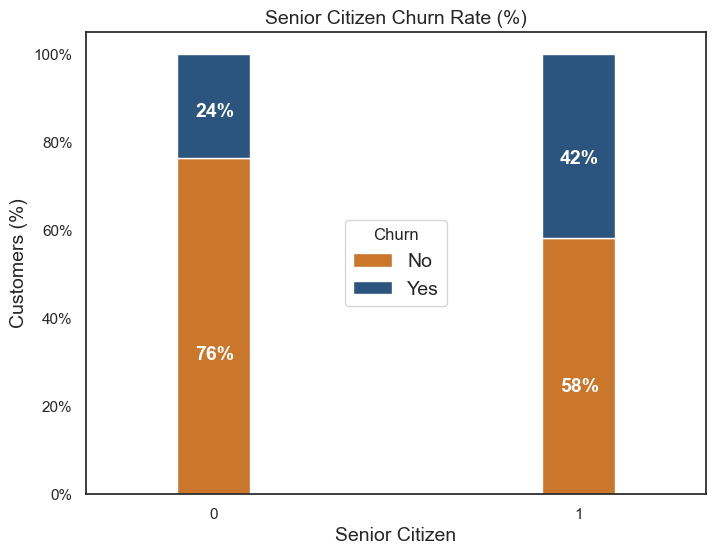

In [24]:
# Churn and Age Category - Senior Citizen

colors = ['#CA762B', '#2B547E']
sc = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
ax = (sc.T*100.0/sc.T.sum()).T.plot(kind='bar', width=0.2, stacked=True, rot=0, figsize=(8,6), color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size':14}, title = 'Churn')

ax.set_ylabel('Customers (%)',size = 14)
ax.set_xlabel('Senior Citizen', size = 14)
ax.set_title('Senior Citizen Churn Rate (%)', size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
               color = 'white', weight = 'bold', size = 14)
    
plt.show()

42% of Senior citizens churn, while the younger people that churn are only 24%

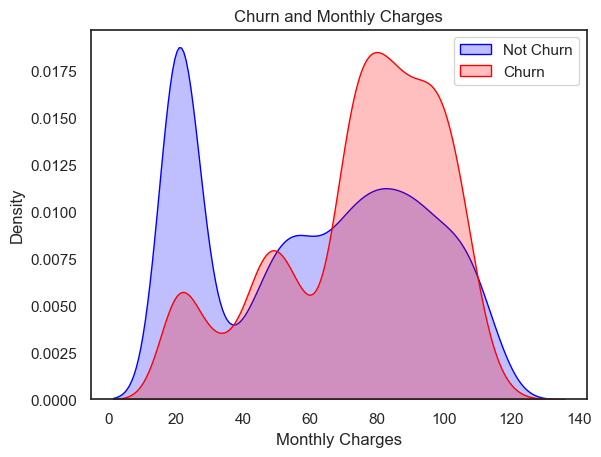

In [25]:
# Monthly Charges and Churn

ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], color="Blue", shade=True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')], color="Red", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Churn and Monthly Charges')

plt.show()

Apparently, a high number of customers churn when the monthly charges is high, as indicated between 70 to 90 dollars

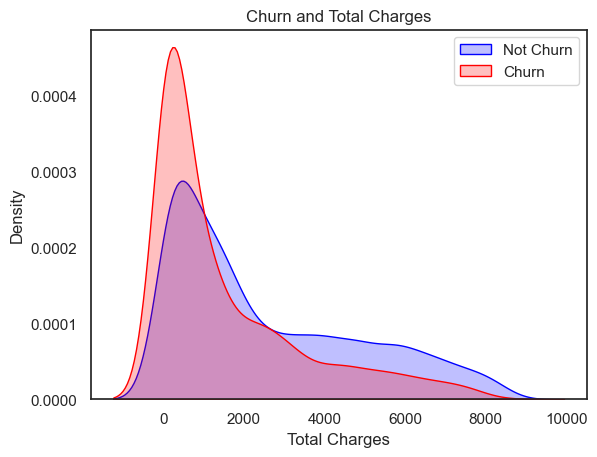

In [26]:
# Total Charges and Churn

ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')], color="Blue", shade=True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')], color="Red", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Churn and Total Charges')

plt.show()

Looks like churn is high when total charges is low here

### Encoding categorical variables

In [69]:
# Import all necessary libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
#Convert all 'True' and 'False' values to 1 and 0
df_dummies = df_dummies.applymap(lambda x: 1 if x is True else (0 if x is False else x))

#Replace 'Female' 'Male' categories with 1 and 0
df['Gender'].replace({'Female':1, 'Male':0}, inplace=True)

df_dummies.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0.000000,0.115423,0.001275,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0.464789,0.385075,0.215867,0,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
2,0,0.014085,0.354229,0.010310,1,0,1,1,0,1,...,0,1,0,1,1,0,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


In [71]:
#Because ML model do not understand text values, we will replace all 'Yes' and 'No' values with 1 and 0
binary_categorical_features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

label_encoder = LabelEncoder()
for feature in binary_categorical_features:
    df_dummies[feature] = label_encoder.fit_transform(df[feature])
    
df_dummies.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0.000000,0.115423,0.001275,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0.464789,0.385075,0.215867,0,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
2,0,0.014085,0.354229,0.010310,1,0,1,1,0,1,...,0,1,0,1,1,0,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


In [72]:
for col in df_dummies:
            print(f'{col} : {df_dummies[col].unique()}')

SeniorCitizen : [0 1]
Tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
MonthlyCharges : [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
TotalCharges : [0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.

In [73]:
# Scale tenure, monthly charges and total charges

cols_to_scale = ['Tenure', 'MonthlyCharges', 'TotalCharges']

df_dummies[cols_to_scale] = scaler.fit_transform(df_dummies[cols_to_scale])

In [74]:
df_dummies.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0.000000,0.115423,0.001275,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0.464789,0.385075,0.215867,0,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
2,0,0.014085,0.354229,0.010310,1,0,1,1,0,1,...,0,1,0,1,1,0,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


## From our EDA above, we will now develope some predictive models

In [64]:
# Using the dataframe created from dummy variables, define matrix X and target vector y

X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn']

In [65]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Initialize models

log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

### Logistic Regression

In [54]:
# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg)}\n")

Logistic Regression:
Accuracy: 0.7867803837953091
Precision: 0.6185897435897436
Recall: 0.516042780748663
F1-Score: 0.5626822157434401



### Random Forest

In [55]:
# Train and evaluate Random Forest
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf)}\n")

Random Forest:
Accuracy: 0.7761194029850746
Precision: 0.604982206405694
Recall: 0.45454545454545453
F1-Score: 0.5190839694656488



### Support Vector Machine

In [56]:
# Train and evaluate SVM
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm)}\n")

Support Vector Machine:
Accuracy: 0.7853589196872779
Precision: 0.6276595744680851
Recall: 0.4732620320855615
F1-Score: 0.5396341463414634



### Analysis
Accuracy - Logistic Regression has the highest accuracy (0.79), indicating it has the highest overall correct predictions. while Random Forest and SVM have equal accuracies of (0.78)

Precision - Logistic Regression again has the highest precision (0.64), meaning it has the highest ratio of true positive predictions to total positive predictions. This indicates fewer false positives. Random forest has a precision of 0.63. Logistic Regression has the lowest precision (0.62)

Recall - Logistic Regression has the highest recall (0.49), meaning it has the highest ratio of true positive predictions to actual positives. This indicates fewer false negatives. SVM has a recall of 0.47. Random Forest has the lowest recall (0.46)

F1-Score - Logistic Regression has the highest F1-score (0.56), which balances both precision and recall. Both Random Forest and SVM stand at (0.53)

### Conclusion: 
Logistic Rgression performs the best across all metrics, indicating it provides the best balance between precision and recall, and has the highest overall accuracy. This makes it a robust choice for this dataset. Random Forest also performs well but slightly below Logistic Regression in all metrics. SVM performs the worst among the three models, but still provides reasonably good performance as its results are very close to those of Random Forest.
When choosing the best model, consider the specific context and requirements of your application:
If the cost of false positives is high, prioritize precision. If the cost of false negatives is high, prioritize recall. If you need a balance of both, look at the F1-score. In this case, the Random Forest model is the best performer, making it the most suitable choice based on the provided metrics.